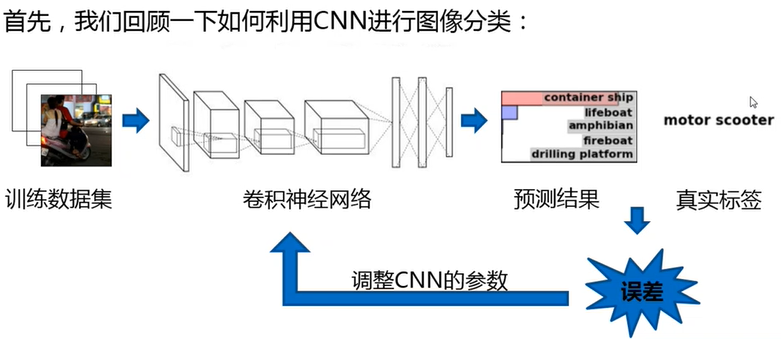


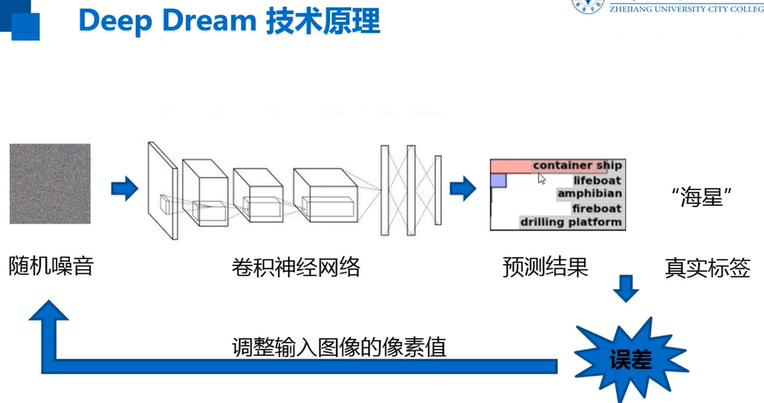

1. 最大化输出层输出的某一类别概率
2. 最大化卷积层某一通道激活值

卷积神经网络是固定的




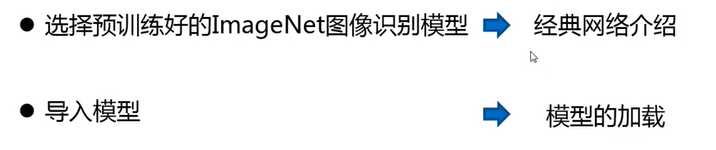


# 经典卷积神经网络
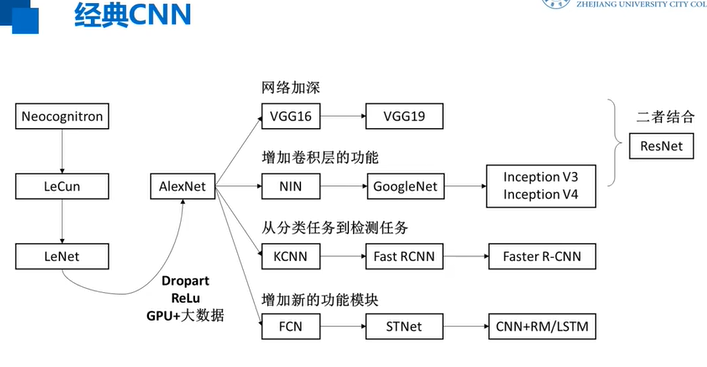

### 经典CNN ---AlexNet
主要贡献： 防止过拟合：数据增强，Dropout  
GPU实现： 将网络分布在俩个GPU上，且GPU之间在某些层能够互相通信  
非线性激活： ReLU  
大数据训练：120万ImageNet图像数据集  
##### 数据增强
利用平移、缩放、颜色等变换，人工增大训练集样本个数，从而获得更充足的训练集，使模型训练效果更好  
水平翻转， 改变对比度，随机裁剪

### 图像编码处理

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np

# 读取图像的原始数据
image_raw_data=tf.gfile.FastGFile('dog.fpg','rb').read()

with tf.Session() as sess:
    # 对图像进行jpeg的格式解码从而得到图像对应的三位矩阵
    img_data = tf.image.decode_jpeg(image_raw_data)
    # img_data = tf.image.decode_png(image_raw_data)
    # 解码之后的结果使一个张量
    print(img_data.eval())
    
    # 可视化
    plt.imshow(img_data.eval())
    plt.show()

## 图像缩放
tf.image.resize_images(images,new_height,new_width,method)

In [ ]:
# 双线性插值法 ResizeMethod.BILINEAR（默认设置），对应method=0

with tf.Session() as sess:
    # 用双线性插值法将图像缩放为指定尺寸
    resized1 = tf.image.resize_images(img_data,[256,256],method=0)
    # Tensorflow的函数处理图片后存储的数据使float32 格式的，需要转换成unit8才能正确打印图片
    resized1 =np.asarray(resized1.eval(),dtype='uint8')
    plt.imshow(resized1)
    plt.show()


In [ ]:
# 最近邻插值法 NEAREST_NEIGHBOR，对应method=1

with tf.Session() as sess:
    # 用最近邻插值法将图像缩放为指定尺寸
    resized2 = tf.image.resize_images(img_data,[256,256],method=1)
    resized2 =np.asarray(resized2.eval(),dtype='uint8')
    plt.imshow(resized2)
    plt.show()

In [ ]:
# 双立方插值法 BICUBIC，对应method=2
with tf.Session() as sess:
    # 用最近邻插值法将图像缩放为指定尺寸
    resized3 = tf.image.resize_images(img_data,[256,256],method=2)
    resized3 =np.asarray(resized3.eval(),dtype='uint8')
    plt.imshow(resized3)
    plt.show()

In [ ]:
# 像素区域插值法AREA，对应method =3
with tf.Session() as sess:
    # 用最近邻插值法将图像缩放为指定尺寸
    resized4 = tf.image.resize_images(img_data,[256,256],method=3)
    resized4 =np.asarray(resized4.eval(),dtype='uint8')
    plt.imshow(resized4)
    plt.show()

## 裁剪 或填充后缩放
tf.image.resize_image_with_crop_or_pad(image,target_height,target_width)  
如果目标图像尺寸小于原始图像尺寸，则在中心位置剪裁，反之则用黑色像素进行填充

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    croped = tf.image.resize_image_with_crop_or_pad(img_data,100,100)
    plt.imshow(croped.eval())
    plt.show()

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    padded = tf.image.resize_image_with_crop_or_pad(img_data,500,500)
    plt.imshow(padded.eval())
    plt.show()
    

## 随机裁剪
tf.image.random_crop(image,size,seed=None,name=None)



In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    random_croped1 = tf.random_crop(img_data,[100,100,3])
    plt.imshow(random_croped1.eval())
    plt.show()

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    random_croped2 = tf.random_crop(img_data,[110,110,3])
    plt.imshow(random_croped2.eval())
    plt.show()

## 水平翻转
tf.image.flip_left_right(img_data)

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    flip_left_right = tf.image.flip_left_right(img_data)
    plt.imshow(flip_left_right.eval())
    plt.axis('off')
    plt.show()

## 上下翻转
tf.image.flip_up_down(img_data)

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.axis('off')
    plt.show()
    flip_up_down = tf.image.flip_up_down(img_data)
    plt.imshow(flip_up_down.eval())
    plt.axis('off')
    plt.show()

## 改变对比度
tf.image.random_contrast

In [ ]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    # 将图像的对比度降低至原来的二分之一
    #contrast = tf.image.adjust_contrast(img_data,0.5)
    # 将图像的对比度提高至原来的5倍
    contrast = tf.image.adjust_contrast(img_data,5)
    # 在[lower,uppre]范围随机调整图像对比度
    # contrast = tf.image.random_contrast(img_data,lower=0.2,upper=3)
    plt.imshow(contrast.eval())
    plt.show()

## 白化处理

In [ ]:
# 将图像的像素值转化成零均值和单位方差
with tf.Session() as sess:
    img_data= tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    standardization = tf.image.per_image_standardization(img_data)
    plt.imshow(np.asarray(standardization.eval(),dtype='uint8'))
    plt.show()
    

# dropout
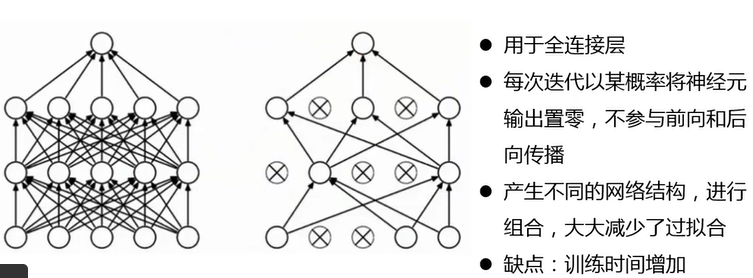

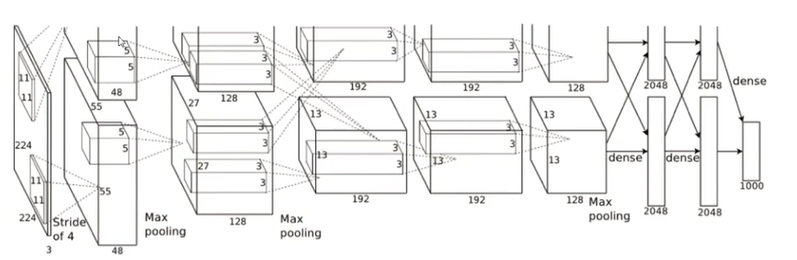

# 经典CNN-VGGNet   2012
1. 可以堪称加深版本的AlexNet
2. 5个卷积组
3. Conv X-Y： 卷积核尺寸X，深度Y
4. 11层~19层
5. 卷积核大小： 3*3
6. 卷积核深度： 大部分都采用了逐层递增的方式
7. VGG-16 和VGG-19
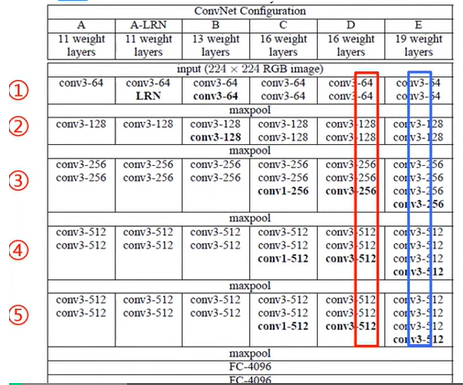

# 经典CNN - GoogleNet  2014
1. 深度
2. 宽度
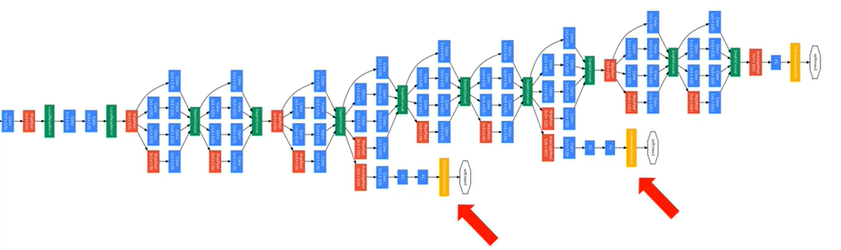


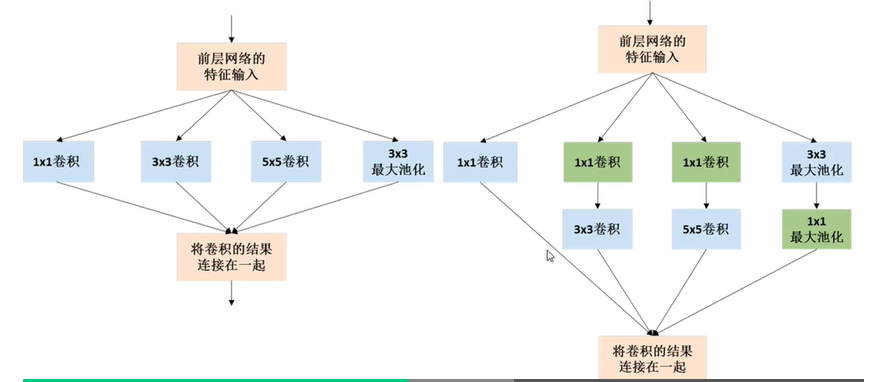

# 经典CNN - ResNet  2015
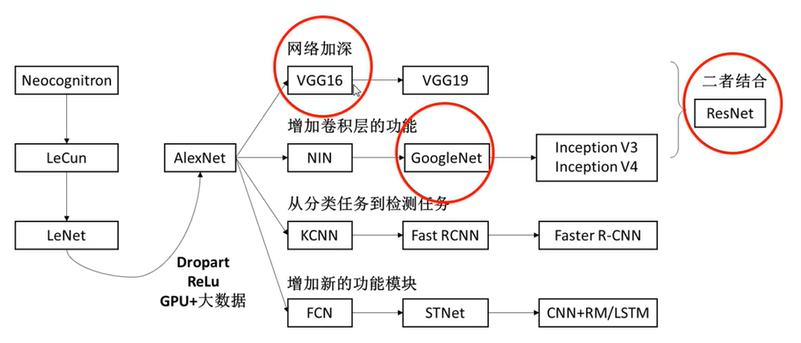

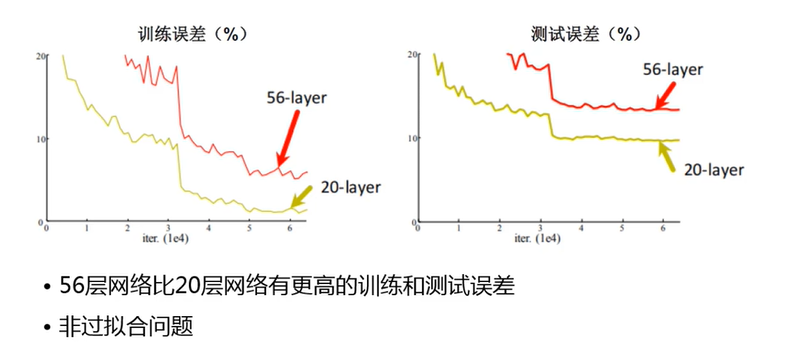

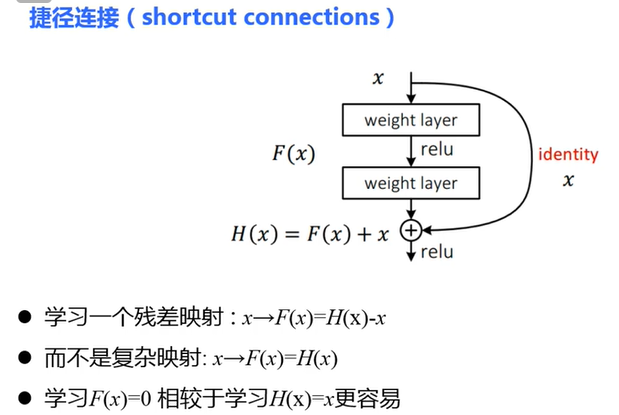

### Model Zoo

# 模型的加载

Tensorflow 提供了以下俩种方式来存储和加载模型：

1. 生成检查点文件，扩展名一般为.ckpt，通过在tf.train.Saver对象上调用Saver.save()生成，通过saver.restore()来加载

2. 生成图协议文件 ，这是一个二进制文件，扩展名一般为.bp， 用tf.train.write_graph()保存，然后使用tf.import_graph_def()来加载图

In [ ]:
# 图的保存与加载
import tensorflow as tf

In [ ]:
# 图的保存
v = tf.Variable(1.0,name = 'my_variable')
with tf.Session() as sess:
    tf.train.write_graph(sess.graph_def,'E:\FIle\dppdf\data','tensorflow_inception_graph.pb',as_text=False)

In [ ]:
# 图的加载
with tf.Session() as sess:
    with tf.gfile.FastGFile('E:\FIle\dppdf\data\tensorflow_inception_graph.pb','rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        sess.graph.as_default()
        tf.import_graph_def(graph_def,name='tf.graph')
        print(graph_def)

In [2]:
# 导入库
from __future__ import print_function
import os
from io import BytesIO
import numpy as np 
from functools import partial
import PIL.Image
import scipy.misc
import tensorflow as tf


In [3]:
#创建图和会话
graph = tf.Graph()
sess= tf.InteractiveSession(graph=graph)

In [4]:
# 导入模型 
# Tensorflow 提供了一种以.pb为扩展名的文件， 可以事先将模型导入到pb文件中， 在需要的时候导出
model_fn = 'E:/FIle/dppdf/data/tensorflow_inception_graph.pb'
with tf.gfile.FastGFile(model_fn,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

Instructions for updating:
Use tf.gfile.GFile.


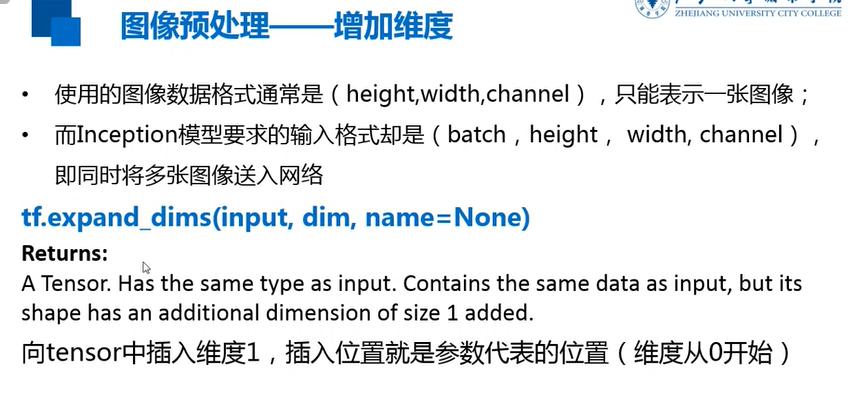

In [ ]:
import tensorflow as tf
import numpy as np
t = [[2,3,3],[1,5,5]]
print("t_shape:",np.shape(t))

In [ ]:
t1 = tf.expand_dims(t,0)
print("t1_shape",np.shape(t1))

In [ ]:
t2 = tf.expand_dims(t,1)
print("t1_shape",np.shape(t2))

In [ ]:
t3 = tf.expand_dims(t,2)
print("t1_shape",np.shape(t3))

In [5]:
# 定义输入图像的占位符
t_input = tf.placeholder(np.float32,name='input')
# 图像预处理 -- 减均值
imagenet_mean = 117.0   # 在训练Inception模型时做了减均值预处理，此处也需减同样的均值以保持一致

# 图像预处理---增加维度
# 图像数据格式 一般是 （height，width，channels),为同时将多张图片输入网络而在前面增加一维
# 变为(batch,height,width,channel)
t_preprocessed = tf.expand_dims(t_input - imagenet_mean,0)

# 导入模型并将经预处理的图像送入网络中
tf.import_graph_def(graph_def,{'input':t_preprocessed})

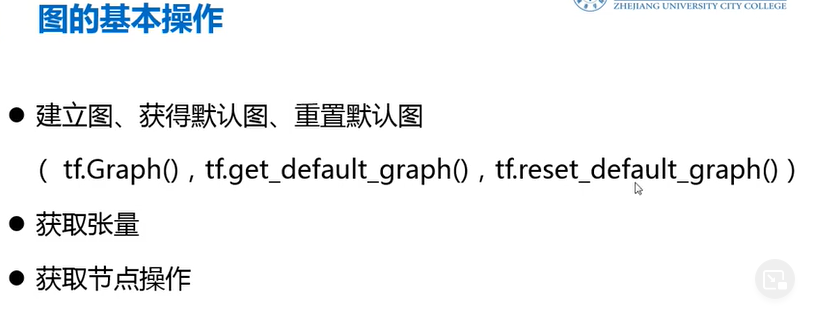

In [ ]:
import numpy as np
import tensorflow as tf
g = tf.Graph()    # 创建新的图
with g.as_default():
    c1 = tf.constant(0.0)           # 在新图中添加变量
    print(c1)
    print("c1.graph",c1.graph)      # 可通过变量的‘。graph’可获得其所在的图

In [ ]:
tf.reset_default_graph()        # 重置默认图
g2 = tf.get_default_graph() # 获得默认图
print("g2:",g2)

In [ ]:
# 获得张量  get_tensor_by_name
# 先获得张量的名字
print(c1.name
     )

In [ ]:
t= g.get_tensor_by_name(name='Const:0')
print(t)

In [ ]:
# 获取节点操作  get_operation_by_name  与张量类似
a = tf.constant([[1.0,2.0]])
b = tf.constant([[1.0],[3.0]])
tensor1 = tf.matmul(a,b,name='example_op')
print(tensor1)
print(tensor1.name)

In [ ]:
# 先将op的名字打印出来
print(tensor1.op.name)

In [ ]:
# 使用函数显示
test_op = g2.get_operation_by_name("example_op")
print(test_op)

#### 找出卷积层

In [6]:
layers = [op.name for op in graph.get_operations() if op.type == 'Conv2D']
# 输出卷积层层数
print('Number of layers',len(layers))


Number of layers 59


In [7]:
# 输出所有卷积层名称
print(layers)

['import/conv2d0_pre_relu/conv', 'import/conv2d1_pre_relu/conv', 'import/conv2d2_pre_relu/conv', 'import/mixed3a_1x1_pre_relu/conv', 'import/mixed3a_3x3_bottleneck_pre_relu/conv', 'import/mixed3a_3x3_pre_relu/conv', 'import/mixed3a_5x5_bottleneck_pre_relu/conv', 'import/mixed3a_5x5_pre_relu/conv', 'import/mixed3a_pool_reduce_pre_relu/conv', 'import/mixed3b_1x1_pre_relu/conv', 'import/mixed3b_3x3_bottleneck_pre_relu/conv', 'import/mixed3b_3x3_pre_relu/conv', 'import/mixed3b_5x5_bottleneck_pre_relu/conv', 'import/mixed3b_5x5_pre_relu/conv', 'import/mixed3b_pool_reduce_pre_relu/conv', 'import/mixed4a_1x1_pre_relu/conv', 'import/mixed4a_3x3_bottleneck_pre_relu/conv', 'import/mixed4a_3x3_pre_relu/conv', 'import/mixed4a_5x5_bottleneck_pre_relu/conv', 'import/mixed4a_5x5_pre_relu/conv', 'import/mixed4a_pool_reduce_pre_relu/conv', 'import/mixed4b_1x1_pre_relu/conv', 'import/mixed4b_3x3_bottleneck_pre_relu/conv', 'import/mixed4b_3x3_pre_relu/conv', 'import/mixed4b_5x5_bottleneck_pre_relu/conv',

In [8]:
# 指定输出卷积层的参数
name1 = 'mixed4d_3x3_bottleneck_pre_relu'
print('shape of %s:%s'%(name1,str(graph.get_tensor_by_name('import/'+name1+':0').get_shape())))

shape of mixed4d_3x3_bottleneck_pre_relu:(?, ?, ?, 144)


##### 卷积层格式：  
一般是(batch,height,width,channel),因为此时不清楚输入图像的数量及大小， 所以前三个维度是不确定的，显示？ 由于导入的是已训练好的模型， 所以指定的卷积层的通道数量是固定的

同一卷积层中不同通道学习到的内容有什么区别？浅层的卷积和深层的卷积学习到的内容又有什么区别？  

同一卷积层中不同通道学习到不同的特征

浅层的卷积得到的是特征图 感受野更加关注的是图像细节纹理等特征

深层的卷积得到的是特征图信息 在语义语境方面更加抽象的高层信息

# 以背景图像为起点生成DeepDream图像

In [9]:
# 定义卷积层， 并取出对应的tensor
name = 'mixed4c'
layer_output = graph.get_tensor_by_name('import/%s:0'% name)
print(layer_output)

Tensor("import/mixed4c:0", shape=(?, ?, ?, 512), dtype=float32, device=/device:CPU:0)


In [10]:
from matplotlib import image
def savearray(img_array,img_name):
    scipy.misc.toimage(img_array).save(img_name)
    #image.imsave(img_name,img_array,cmap='Greys')
    print('img saved:%s'%img_name)

In [11]:
# 渲染函数 
def render_naive(t_obj,img0,iter_n=20,step=1.0):
    # t_obj 是layer_output[;,;,;,channel],即卷积层某个通道的值
    #img0 初始图像（噪声图像）
    #iter_n 迭代次数
    #step:用于控制每次迭代步长
    t_score =tf.reduce_mean(t_obj)
    # t_score 是t_obj的平均值
    # 由于我们的目标是调整输入图像使卷积层激活值尽可能大
    #即最大化t_score
    # 为达到此目标 可使用梯度下降
    # 计算t_score对t_input的梯度
    t_grad = tf.gradients(t_score,t_input)[0]
    
    img = img0.copy()
    # 复制新图像可避免影响原图像的值
    for i in range(iter_n):
        #在sess中计算梯度，以及当前的t_score
        g,score=sess.run([t_grad,t_score],{t_input:img})
        #对img应用梯度
        # 首先对梯度进行归一化处理
        g/=g.std()+1e-8
        # 将正规化处理后的梯度应用在图像上，step用于控制每次迭代步长，此处为1.0
        img +=g*step
        #print('score(mean)=%f%(score))
        print('iter:%d'%(i+1),'score(mean)=%f'%score)
        # 保存图片
    savearray(img,'naive_deepdream.jpg')
    #把一个数组保存成图像文件

In [16]:
# 用一张背景图像（而不是随即噪音图像） 作为起点对图像进行优化
img_test = PIL.Image.open('mountain.jpg')
# img_noise = np.random.uniform(size=(224,224,3))+100.0

# 调用render_naive 函数渲染

render_naive(layer_output,img_noise,iter_n=100)  # 不指定特定通道， 即表示利用所有通道特征
# 单通道是， layer_output[;,;,;,channel]
# 保存并显示图片
im=PIL.Image.open('naive_deepdream.jpg')
im.show()
im.save('mountain_naive.jpg')

iter:1 score(mean)=-6.656204
iter:2 score(mean)=-9.385893
iter:3 score(mean)=-6.560946
iter:4 score(mean)=0.187707
iter:5 score(mean)=6.129596
iter:6 score(mean)=11.789098
iter:7 score(mean)=15.280302
iter:8 score(mean)=18.248545
iter:9 score(mean)=22.857925
iter:10 score(mean)=24.944506
iter:11 score(mean)=28.473387
iter:12 score(mean)=29.914333
iter:13 score(mean)=34.713123
iter:14 score(mean)=37.430492
iter:15 score(mean)=40.361057
iter:16 score(mean)=42.659340
iter:17 score(mean)=45.617638
iter:18 score(mean)=47.718155
iter:19 score(mean)=49.811420
iter:20 score(mean)=52.821884
iter:21 score(mean)=52.990822
iter:22 score(mean)=55.085690
iter:23 score(mean)=56.723171
iter:24 score(mean)=59.933960
iter:25 score(mean)=60.264004
iter:26 score(mean)=62.836819
iter:27 score(mean)=64.110725
iter:28 score(mean)=66.180695
iter:29 score(mean)=68.172966
iter:30 score(mean)=68.884315
iter:31 score(mean)=70.700050
iter:32 score(mean)=71.881058
iter:33 score(mean)=73.572899
iter:34 score(mean)=7

E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### 通过单通道特征生成DeepDream图像

In [12]:
name = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 139
layer_output = graph.get_tensor_by_name('import/%s:0'%name)


img_noise = np.random.uniform(size=(224,224,3))+100.0
# 单通道
render_naive(layer_output[:,:,:,channel],img_noise,iter_n=20)
# 多通道
# render_naive(layer_output],img_noise,iter_n=20)
# 保存并显示图片
im = PIL.Image.open('naive_deepdream.jpg')
im.show()
im.save('naive_single_chn.jpg')

iter:1 score(mean)=-19.980637
iter:2 score(mean)=-32.674332
iter:3 score(mean)=10.685727
iter:4 score(mean)=87.207779
iter:5 score(mean)=153.964111
iter:6 score(mean)=211.036957
iter:7 score(mean)=266.287750
iter:8 score(mean)=314.312439
iter:9 score(mean)=361.579865
iter:10 score(mean)=415.745667
iter:11 score(mean)=451.212585
iter:12 score(mean)=490.379791
iter:13 score(mean)=530.342773
iter:14 score(mean)=574.406067
iter:15 score(mean)=606.846985
iter:16 score(mean)=635.303955
iter:17 score(mean)=656.033691
iter:18 score(mean)=689.783325
iter:19 score(mean)=716.577087
iter:20 score(mean)=741.684143
img saved:naive_deepdream.jpg


E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


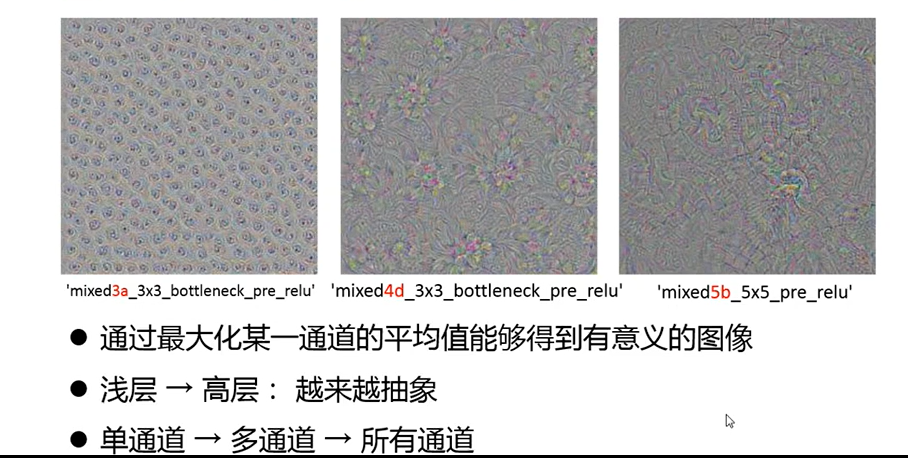

# 生成更加柔和的DeepDream图像

In [32]:
from __future__ import print_function
import os
from io import BytesIO
import numpy as np 
from functools import partial
import PIL.Image
import scipy.misc
import tensorflow as tf

In [33]:
#创建图和会话
graph = tf.Graph()
sess= tf.InteractiveSession(graph=graph)

E:\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [34]:
# 导入模型 
# Tensorflow 提供了一种以.pb为扩展名的文件， 可以事先将模型导入到pb文件中， 在需要的时候导出
model_fn = 'tensorflow_inception_graph.pb'
with tf.gfile.FastGFile(model_fn,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

In [35]:
# 定义输入图像的占位符
t_input = tf.placeholder(np.float32,name='input')
# 图像预处理 -- 减均值
imagenet_mean = 117.0   # 在训练Inception模型时做了减均值预处理，此处也需减同样的均值以保持一致

# 图像预处理---增加维度
# 图像数据格式 一般是 （height，width，channels),为同时将多张图片输入网络而在前面增加一维
# 变为(batch,height,width,channel)
t_preprocessed = tf.expand_dims(t_input - imagenet_mean,0)

# 导入模型并将经预处理的图像送入网络中
tf.import_graph_def(graph_def,{'input':t_preprocessed})

In [36]:
# 保存图像
def savearray(img_array,img_name):
    scipy.misc.toimage(img_array).save(img_name)
    #image.imsave(img_name,img_array,cmap='Greys')
    print('img saved:%s'%img_name)
    
# 将图像放大ratio倍
def resize_ratio(img,ratio):
    min=img.min()
    max= img.max()
    img = (img-min)/(max-img)*255
    img=np.float32(scipy.misc.imresize(img,ratio))
    img=img/255*(max-min)+min
    return img

# 调整图像尺寸
def resize(img,hw):
    min=img.min()
    max= img.max()
    img = (img-min)/(max-img)*255
    img=np.float32(scipy.misc.imresize(img,hw))
    img=img/255*(max-min)+min
    return img

# 原始图像尺寸可能很大， 从而导致内存耗尽问题
# 每次只对 tile_size*tile_size 大小的图像计算梯度，避免内存问题
def calc_grad_tiled(img,t_grad,tile_size=512):
    sz = tile_size
    h,w=img.shape[:2]
    sx,sy=np.random.randint(sz,size=2)
    img_shift=np.roll(np.roll(img,sx,1),sy,0) # 现在行上做整体移动， 再在列上做整体移动
    grad = np.zeros_like(img)
    for y in range(0,max(h-sz//2,sz),sz):
        for x in range(0,max(w-sz//2,sz),sz):
            sub = img_shift[y:y+sz,x:x+sz]
            g=sess.run(t_grad,{t_input:sub})
            grad[y:y+sz,x:x+sz]=g
    return np.roll(np.roll(grad,-sx,1),-sy,0)


def render_deepdream(t_obj,img0,
                     iter_n=10,step=1.5,
                     octave_n=4,octave_scale=1.4):
    # t_obj 是layer_output[;,;,;,channel],即卷积层某个通道的值
    #img0 初始图像（噪声图像）
    #iter_n 迭代次数
    #step:用于控制每次迭代步长
    # octave_n 金字塔层数
    # octave_scale  层与层之间的倍数
   
    t_score =tf.reduce_mean(t_obj)
    # t_score 是t_obj的平均值
    # 由于我们的目标是调整输入图像使卷积层激活值尽可能大
    #即最大化t_score
    # 为达到此目标 可使用梯度下降
    # 计算t_score对t_input的梯度
    t_grad = tf.gradients(t_score,t_input)[0]
    
    img = img0.copy()
    # 复制新图像可避免影响原图像的值
    
    
    # 将图像进行金字塔分解
    # 从而分为高频，低频部分
    octaves = []
    for i in range(octave_n-1):
        hw = img.shape[:2]      # 缩放后图像的高和宽
        lo = resize(img,np.int32(np.float32(hw)/octave_scale))
        hi = img - resize(lo,hw)
        img = lo
        octaves.append(hi)
    
    # 首先生成低频的图像， 再一次放大并加上高频
    for octave in range(octave_n):
        if octave > 0:
            hi = octaves[-octave]
            img=resize(img,hi.shape[:2])+hi
        for i in range(iter_n):
            g=calc_grad_tiled(img,t_grad)
            img+=g*(step/(np.abs(g).mean()+ 1e-7))
    
    img= img.clip(0,255)
    savearray(img,'mountain_deepdream.jpg')
    im = PIL.Image.open('mountain_deepdream.jpg').show()
    


In [37]:
name='mixed4c'
layer_output = graph.get_tensor_by_name('import/%s:0'%name)
img0 = PIL.Image.open('mountain.jpg')
img0 = np.float32(img0)
render_deepdream(tf.square(layer_output),img0)

E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
E:\Anaconda3\envs\tf1\lib\site-packages\scipy\misc\pilutil.py:104: RuntimeWarning: invalid value encountered in multiply
  bytedata = (data - cmin) * scale + low
E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
E:\Anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


img saved:mountain_deepdream.jpg


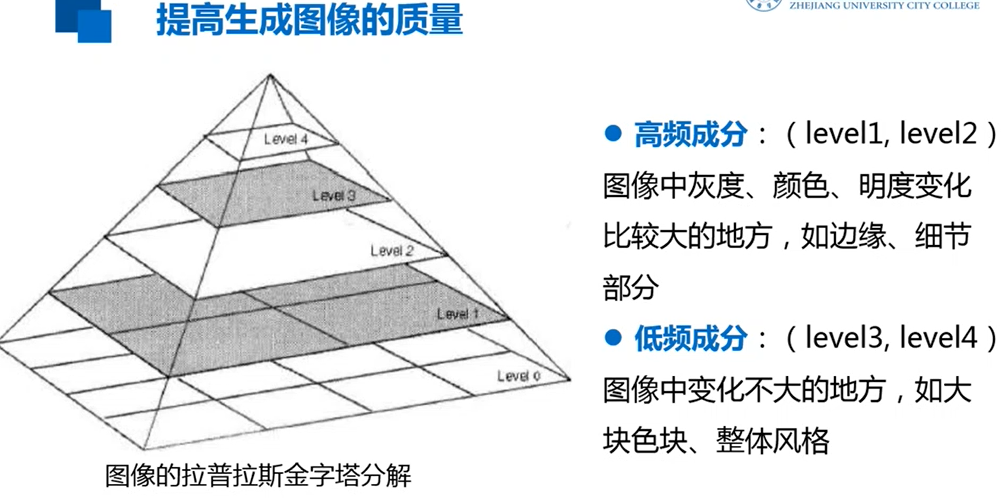